In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
import os
# os.environ['PYTHONPATH'] += ':/content/gdrive/MyDrive/22FL/CS101-TA/optimized_bio_sensor/RockleyCodesign'
os.environ['PYTHONPATH'] += ':/content/gdrive/MyDrive/optimized_bio_sensor/RockleyCodesign'
# %cd /content/gdrive/MyDrive/22FL/CS101-TA/optimized_bio_sensor/RockleyCodesign
%cd /content/gdrive/MyDrive/optimized_bio_sensor/rockley

Mounted at /content/gdrive
/content/gdrive/.shortcut-targets-by-id/1EaHvULJYewcfEpQ7wlYgmG1eRbVcahUv/optimized_bio_sensor/rockley


In [2]:
import utils.data as data_loader
 
train, val, test = data_loader.load_train_test_val(
    trainfile="../data/train_regression.parquet",
    testfile="../data/test_regression.parquet",
    standardize=True,
    precision=64,
)

Xtrain, Ytrain = train
Xval, Yval = val
Xtest, Ytest = test

In [3]:
import torch.nn as nn
import torch
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Function for mean squared error just to make sure its computing correctly
def calculate_mse(Y1, Y2):
  return np.mean((Y1 - Y2) ** 2)

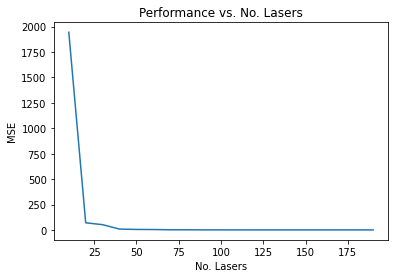

In [7]:
import sklearn
import sklearn.linear_model

mse = []
kvals = range(10, 197, 10)
for k in kvals:
  idxs = [int(i / k * 196) for i in range(1, k + 1)]
  # print(idxs)
  Xcut = Xtrain[:, idxs]
  cut_clf = sklearn.linear_model.LinearRegression()
  cut_clf.fit(Xcut, Ytrain)
  predicted = cut_clf.predict(Xval[:, idxs])
  mse.append(calculate_mse(predicted, Yval))

plt.plot(kvals, mse)
plt.title("Performance vs. No. Lasers")
plt.xlabel("No. Lasers")
plt.ylabel("MSE")
plt.show()

In [8]:
mse

[1943.882666315385,
 70.20663950419382,
 51.79938327822261,
 8.534573768267812,
 4.997452399291674,
 4.037607575470639,
 1.7208258328723884,
 1.3395394171181587,
 0.7177426816101549,
 0.47853604849632425,
 0.5115916736538432,
 0.35900362330442454,
 0.35050006565171343,
 0.32956269163610813,
 0.330980511288301,
 0.31401336035630867,
 0.3025351777637971,
 0.28494201428552207,
 0.249689185118464]

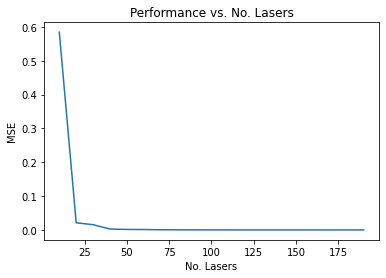

In [9]:
import sklearn
import sklearn.linear_model

mse = []
kvals = range(10, 197, 10)
Yn_train = (Ytrain - np.mean(Ytrain, axis=0)) / np.std(Ytrain, axis=0)
Yn_val = (Yval - np.mean(Ytrain, axis=0)) / np.std(Ytrain, axis=0)
for k in kvals:
  idxs = [int(i / k * 196) for i in range(1, k + 1)]
  # print(idxs)
  Xcut = Xtrain[:, idxs]
  cut_clf = sklearn.linear_model.LinearRegression()
  cut_clf.fit(Xcut, Yn_train)
  predicted = cut_clf.predict(Xval[:, idxs])
  mse.append(calculate_mse(predicted, Yn_val))

plt.plot(kvals, mse)
plt.title("Performance vs. No. Lasers")
plt.xlabel("No. Lasers")
plt.ylabel("MSE")
plt.show()

In [10]:
mse

[0.5840845544579374,
 0.02109521035676726,
 0.015564324034333414,
 0.002564410292508125,
 0.001501600281048837,
 0.0012131926801221566,
 0.0005170619643422943,
 0.0004024956326782574,
 0.0002156624068894737,
 0.0001437872354697861,
 0.0001537195634119214,
 0.00010787095075762745,
 0.00010531585995245526,
 9.902474119446181e-05,
 9.945075793979138e-05,
 9.435258460627187e-05,
 9.090369884041135e-05,
 8.561742539111277e-05,
 7.502489673731654e-05]